<a href="https://colab.research.google.com/github/jdsala/Analise-Preditiva/blob/main/Analise_Preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

#Importando arquivo

In [ ]:
#Importar arquivo
uploaded = files.upload()

Saving olist_order_reviews_dataset.xlsx to olist_order_reviews_dataset (2).xlsx


In [ ]:
# Define endereço para abrir o arquivo no Google Drive
# 1- Importa Dataset
df = pd.read_excel('olist_order_reviews_dataset.xlsx')
df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Unnamed: 7
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,0.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,NaN
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,NaN
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37,NaN
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34,NaN
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06,NaN
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37,NaN
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,NaN


In [ ]:
# 2- Verificação de dados faltantes

# Verificar valores ausentes e excluindo colunas que contem nomes "Unnamed"
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87658
review_comment_message     58256
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
df['review_comment_title'] = df['review_comment_title'].fillna('Sem título')
df['review_comment_message'] = df['review_comment_message'].fillna('Sem comentário')
df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dia_da_criacao,mes_da_criacao,ano_da_criacao,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Sem título,Sem comentário,2018-01-18,2018-01-18 21:46:59,18,1,2018,Satisfeito
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Sem título,Sem comentário,2018-03-10,2018-03-11 03:05:13,10,3,2018,Muito Satisfeito
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Sem título,Sem comentário,2018-02-17,2018-02-18 14:36:24,17,2,2018,Muito Satisfeito
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Sem título,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,21,4,2017,Muito Satisfeito
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Sem título,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1,3,2018,Muito Satisfeito
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Sem título,Sem comentário,2018-04-13,2018-04-16 00:39:37,13,4,2018,Muito Insatisfeito
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Sem título,Sem comentário,2017-07-16,2017-07-18 19:30:34,16,7,2017,Muito Satisfeito
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,Sem título,Sem comentário,2018-08-14,2018-08-14 21:36:06,14,8,2018,Muito Satisfeito
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,Sem título,Sem comentário,2017-05-17,2017-05-18 12:05:37,17,5,2017,Muito Satisfeito
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,22,5,2018,Satisfeito


In [ ]:
# 3-Transformação da coluna review_creation_date (data_da_criação)

df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['dia_da_criacao'] = df['review_creation_date'].dt.day
df['mes_da_criacao'] = df['review_creation_date'].dt.month
df['ano_da_criacao'] = df['review_creation_date'].dt.year

df.head(10)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dia_da_criacao,mes_da_criacao,ano_da_criacao,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Sem título,Sem comentário,2018-01-18,2018-01-18 21:46:59,18,1,2018,Satisfeito
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Sem título,Sem comentário,2018-03-10,2018-03-11 03:05:13,10,3,2018,Muito Satisfeito
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Sem título,Sem comentário,2018-02-17,2018-02-18 14:36:24,17,2,2018,Muito Satisfeito
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Sem título,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,21,4,2017,Muito Satisfeito
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Sem título,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1,3,2018,Muito Satisfeito
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Sem título,Sem comentário,2018-04-13,2018-04-16 00:39:37,13,4,2018,Muito Insatisfeito
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Sem título,Sem comentário,2017-07-16,2017-07-18 19:30:34,16,7,2017,Muito Satisfeito
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,Sem título,Sem comentário,2018-08-14,2018-08-14 21:36:06,14,8,2018,Muito Satisfeito
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,Sem título,Sem comentário,2017-05-17,2017-05-18 12:05:37,17,5,2017,Muito Satisfeito
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,22,5,2018,Satisfeito


In [ ]:
# 4- Transformação da coluna review_score (avaliação):

mapa_review = {
    1: "Muito Insatisfeito",
    2: "Insatisfeito",
    3: "Indiferente",
    4: "Satisfeito",
    5: "Muito Satisfeito"

}
df['review'] = df['review_score'].map(mapa_review)
# Mostrando as 10 primeiras
df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dia_da_criacao,mes_da_criacao,ano_da_criacao,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Sem título,Sem comentário,2018-01-18,2018-01-18 21:46:59,18,1,2018,Satisfeito
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Sem título,Sem comentário,2018-03-10,2018-03-11 03:05:13,10,3,2018,Muito Satisfeito
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Sem título,Sem comentário,2018-02-17,2018-02-18 14:36:24,17,2,2018,Muito Satisfeito
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Sem título,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,21,4,2017,Muito Satisfeito
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Sem título,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1,3,2018,Muito Satisfeito
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Sem título,Sem comentário,2018-04-13,2018-04-16 00:39:37,13,4,2018,Muito Insatisfeito
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Sem título,Sem comentário,2017-07-16,2017-07-18 19:30:34,16,7,2017,Muito Satisfeito
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,Sem título,Sem comentário,2018-08-14,2018-08-14 21:36:06,14,8,2018,Muito Satisfeito
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,Sem título,Sem comentário,2017-05-17,2017-05-18 12:05:37,17,5,2017,Muito Satisfeito
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,22,5,2018,Satisfeito


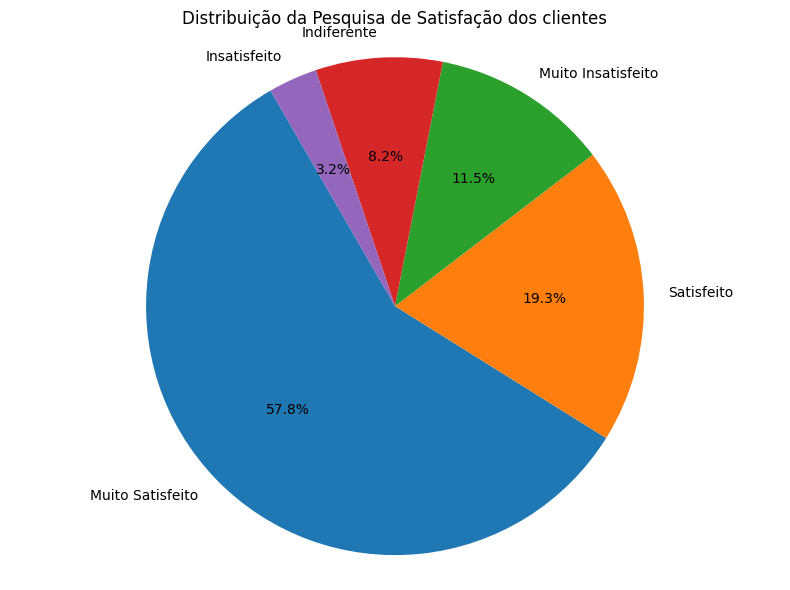

In [ ]:
# 5 Discretização da review:
# Efetue a discretização da coluna review. Efetue a criação de um gráfico de pizza para apresentar a pesquisa de satisfação dos clientes.
review_count = df['review'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(review_count, labels=review_count.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribuição da Pesquisa de Satisfação dos clientes')
plt.axis('equal')
plt.tight_layout()
plt.show()